<a href="https://colab.research.google.com/github/jeongwoo22/ESAA_assignments/blob/main/OB_%EA%B3%BC%EC%A0%9C2_0916.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Tree And Random Forest Classifier Models



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [4]:
from google.colab import files
myfile = files.upload()

Saving drug200.csv to drug200.csv


In [7]:
import io
data = pd.read_csv(io.BytesIO(myfile['drug200.csv']))
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


## Data Review

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [9]:
data.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [10]:
data.corr()

,Age,Na_to_K
Age,1.000000,-0.063119
Na_to_K,-0.063119,1.000000


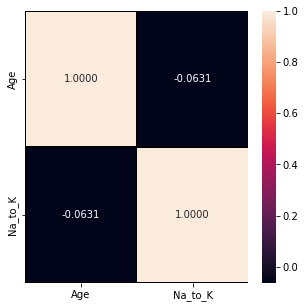

In [12]:
f, ax = plt.subplots(figsize = (5,5))
sns.heatmap(data.corr(), annot=True, linewidths = 0.5, linecolor = "black", fmt=".4f", ax = ax)
plt.show() # age 와 na_to_k 의 상관계수를 히트맵으로 표현하기

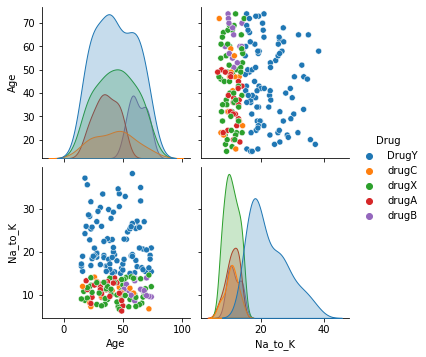

In [13]:
sns.pairplot(data, hue = "Drug")

In [14]:
data.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [16]:
data["Age"].value_counts(dropna=False)

47    8
23    7
28    7
49    7
39    6
32    6
50    5
37    5
58    5
60    5
22    5
34    4
72    4
51    4
42    4
26    4
24    4
74    4
67    4
68    4
61    4
56    4
20    4
36    4
45    4
41    4
31    4
43    4
65    4
57    4
53    3
40    3
70    3
59    3
16    3
38    3
15    3
69    3
35    3
18    3
64    3
52    2
55    2
62    2
19    2
29    2
66    2
73    2
46    2
48    2
54    1
17    1
33    1
63    1
30    1
21    1
25    1
Name: Age, dtype: int64

In [17]:
data["Sex"].value_counts()

M    104
F     96
Name: Sex, dtype: int64

In [18]:
data["BP"].value_counts()

HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64

In [19]:
data["Cholesterol"].value_counts()

HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64

In [20]:
data["Drug"].value_counts()

DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

## Data Visualization

In [22]:
dataAge = data["Age"].value_counts(dropna=False) # 결측값 포함
npar_dataAge = np.array(dataAge)
x = list(npar_dataAge)
y = data.Age.value_counts().index

DataAge = {"Age" : y, "Number" : x}
DataAge = pd.DataFrame(DataAge)

fig = px.bar(DataAge, x="Age", y ="Number")
fig.show()

In [23]:
colors = ["gold", "mediumturquoise"]

fig = go.Figure(data=[go.Pie(labels = ["M", "F"], values = [104, 96])])

fig.update_traces(hoverinfo = 'label + percent', textinfo = 'value', textfont_size = 20,
                 marker = dict(colors = colors, line = dict( color = '#000000', width = 2)))

fig.show()

In [24]:
fig = px.bar(x = ["HIGH", "LOW", "NORMAL"], y = [77, 64, 59])

fig.show()

In [25]:
fig = px.histogram(x = ["HIGH", "NORMAL"], y = [103, 97])
fig.show()

In [26]:
fig = go.Figure(data = [go.Pie(labels=["DrugY","DrugX","DrugA","DrugC","DrugB"], values=[91,54,23,16,16])])

fig.update_traces(hoverinfo = 'label + percent', textinfo = 'value', textfont_size = 20,
                 marker = dict(colors = px.colors.sequential.RdBu, line = dict( color = '#000000', width = 2)))

fig.show()

In [27]:
fig = px.scatter(data, x = "Na_to_K", y="Age", color="Drug",
                 size='Age', hover_data=['Na_to_K'])
fig.show()

## Classifications Models

In [28]:
from google.colab import files
myfile = files.upload()

import io
dataclass = pd.read_csv(io.BytesIO(myfile['drug200.csv']))
dataclass.head()

Saving drug200.csv to drug200 (1).csv


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [29]:
dataclass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [32]:
# 성별을 각각 숫자 0,1 로 바꾸기
dataclass.Sex = [1 if i =="F" else 0 for i in dataclass.Sex]
dataclass.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,HIGH,HIGH,25.355,DrugY
1,47,0,LOW,HIGH,13.093,drugC
2,47,0,LOW,HIGH,10.114,drugC
3,28,0,NORMAL,HIGH,7.798,drugX
4,61,0,LOW,HIGH,18.043,DrugY


In [34]:
# 혈압을 낮고, 정상, 높은 순으로 2,1,0 할당하기
import warnings
warnings.filterwarnings('ignore')

for i in range(0, len(dataclass.BP)):
  if dataclass.BP[i] == "LOW":
    dataclass.BP[i] = 2
  elif dataclass.BP[i] == "NORMAL":
    dataclass.BP[i] = 1
  else : 
    dataclass.BP[i] = 0

dataclass.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,HIGH,25.355,DrugY
1,47,0,0,HIGH,13.093,drugC
2,47,0,0,HIGH,10.114,drugC
3,28,0,0,HIGH,7.798,drugX
4,61,0,0,HIGH,18.043,DrugY


In [35]:
# 콜레스테롤 타입, high는 1, normal 은 0 으로 대체
dataclass.Cholesterol = [1 if i=="HIGH" else 0 for i in dataclass.Cholesterol]
dataclass.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,1,25.355,DrugY
1,47,0,0,1,13.093,drugC
2,47,0,0,1,10.114,drugC
3,28,0,0,1,7.798,drugX
4,61,0,0,1,18.043,DrugY


In [36]:
# 약물 타입 b,c,a,x,y 순으로 0,1,2,3,4 로 바꾸기 
import warnings
warnings.filterwarnings('ignore')

for i in range(0,len(dataclass)):
    if dataclass.Drug[i] == "DrugY":
        dataclass.Drug[i] = 4
    elif dataclass.Drug[i] == "drugX":
        dataclass.Drug[i] = 3
    elif dataclass.Drug[i] == "drugA":
        dataclass.Drug[i] = 2
    elif dataclass.Drug[i] == "drugC":
        dataclass.Drug[i] = 1
    else:
        dataclass.Drug[i] = 0

dataclass.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,1,25.355,4
1,47,0,0,1,13.093,1
2,47,0,0,1,10.114,1
3,28,0,0,1,7.798,3
4,61,0,0,1,18.043,4


In [37]:
dataclass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    int64  
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    int64  
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.5+ KB


In [38]:
# 약, 혈압 의 데이터 타입이 정수로 바뀌지 않아서 int 로 바꿔주기 
data_types_dict = {'BP':int, 'Drug':int}
dataclass = dataclass.astype(data_types_dict)
dataclass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    int64  
 2   BP           200 non-null    int64  
 3   Cholesterol  200 non-null    int64  
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 9.5 KB


In [39]:
# x, y 데이터로 나누기 
x_data = dataclass.drop(["Drug"], axis =1)

y_data = dataclass.Drug.values

In [40]:
x_data.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0,0,1,25.355
1,47,0,0,1,13.093
2,47,0,0,1,10.114
3,28,0,0,1,7.798
4,61,0,0,1,18.043


In [43]:
y_data # 주의 : y_data 가 값들만 뽑아냈으므로, array 형태이다. 

array([4, 1, 1, 3, 4, 3, 4, 1, 4, 4, 1, 4, 4, 4, 3, 4, 3, 2, 1, 4, 4, 4,
       4, 4, 4, 4, 4, 3, 4, 4, 3, 0, 3, 4, 3, 3, 2, 3, 3, 3, 4, 0, 4, 3,
       3, 3, 2, 1, 4, 4, 4, 3, 4, 4, 0, 1, 0, 4, 3, 4, 4, 2, 4, 3, 0, 4,
       2, 3, 4, 4, 0, 4, 3, 4, 4, 4, 2, 4, 2, 3, 0, 3, 1, 2, 1, 0, 3, 4,
       4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 2, 2, 1, 3, 4, 3, 3, 4, 0, 4,
       2, 3, 3, 3, 3, 4, 3, 3, 2, 4, 4, 4, 4, 4, 0, 4, 4, 3, 4, 3, 4, 4,
       3, 4, 4, 3, 0, 2, 0, 3, 2, 4, 0, 4, 2, 3, 3, 2, 3, 1, 2, 0, 3, 3,
       4, 1, 2, 4, 1, 3, 3, 0, 3, 4, 4, 4, 4, 3, 4, 2, 3, 3, 4, 4, 2, 4,
       2, 4, 4, 4, 4, 3, 3, 4, 4, 4, 0, 2, 4, 4, 4, 2, 4, 1, 4, 1, 1, 3,
       3, 3])

In [44]:
# 훈련 데이터셋 분리하기 
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.3, random_state=1)

## Decision Tree Classifier

In [48]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

dtc = DecisionTreeClassifier()

dtc.fit(x_train, y_train)

predict = dtc.predict(x_test)

print('The accuracy of the Decision Tree is', metrics.accuracy_score(predict, y_test))

The accuracy of the Decision Tree is 0.6833333333333333


### Decision Tree Classifier with "gini"

- 의사결정트리에 대하여 
의사결정트리 분류기는 스무고개와 같이 분류를 진행한다. 
의사결정트리의 공식을 보면 노드를 계속 만들어 주는데 노드를 분기하기 위한 최적의 질문을 정보이득(information gain) 이라는 값이 최대가 되도록 만들어줘야 한다. 정보 이득을 구하는 공식은 정해져있다. 이 공식의 원소들을 보면 데이터의 특성값, 데이터 세트, 데이터 불순도 등이 있다. 
데이터 불순도란 데이터가 제대로 분류되지 않고 섞여 있는 정도를 말한다. 
앞서 정보이득을 최대로 만들어 주어야 결정이 잘된다고 하였는데, 정보이득은 데이터 불순도가 작을수록 커지게 된다. 
데이터 불순도를 측정하는 방법에는 3가지가 있으며, 지니인덱스, 엔트로피, 분류오류 가 있다. 이 방법들 모두 공식이 존재한다. 
결론은 데이터 불순도를 알 수 있는 지니인덱스, 엔트로피, 분류오류를 계산해 본 뒤 정보이득이 더 큰 모델을 선택해야하는것.
https://m.blog.naver.com/samsjang/220978650404 


In [49]:
# 의사결정트리 (DecisionTreeClassifier) 의 지니계수 관련
# ++ 참고로 지니계수는 클래쓰들이 공평하게 섞여 있을 수록 지니 계수는 올라간다.
# 그리고 Decision Tree는 지니 불순도를 낮추는 방향으로 가지치기를 진행한다.
# criterion 은 어떤 불순도 방법을 선택할건지, max_depth 는 결정트리의 깊이를 의미.

DTC_gini = DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=0)
DTC_gini.fit(x_train, y_train)


DecisionTreeClassifier(max_depth=3, random_state=0)

In [50]:
y_pred_gini = DTC_gini.predict(x_test)

In [51]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index : {0:0.4f}'.format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index : 0.7000


In [52]:
y_pred_train_gini = DTC_gini.predict(x_train)
y_pred_train_gini

array([3, 3, 1, 4, 1, 1, 3, 3, 4, 1, 3, 1, 4, 0, 4, 3, 4, 1, 4, 4, 4, 4,
       3, 4, 1, 4, 1, 3, 1, 3, 4, 3, 0, 3, 3, 1, 1, 1, 3, 4, 4, 4, 4, 3,
       1, 3, 0, 3, 4, 3, 4, 1, 4, 4, 1, 0, 4, 4, 1, 4, 4, 4, 3, 1, 4, 4,
       4, 3, 4, 1, 3, 3, 3, 3, 4, 4, 4, 4, 1, 4, 3, 3, 3, 4, 0, 4, 0, 4,
       4, 0, 4, 4, 1, 1, 4, 1, 1, 4, 1, 4, 4, 3, 4, 4, 4, 4, 4, 4, 1, 4,
       4, 3, 3, 1, 1, 4, 1, 4, 4, 4, 0, 4, 3, 3, 3, 1, 4, 4, 4, 4, 4, 1,
       1, 4, 3, 4, 1, 1, 3, 3])

In [53]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.7429


In [54]:
print('Training set score: {:.4f}'.format(DTC_gini.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(DTC_gini.score(x_test, y_test)))

Training set score: 0.7429
Test set score: 0.7000


### Decision Tree Classifier with "entropy"

In [56]:
DTC_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
DTC_en.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [57]:
y_pred_en = DTC_en.predict(x_test)

In [58]:
print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.7000


In [59]:
y_pred_train_en = DTC_en.predict(x_train)

y_pred_train_en

array([3, 3, 1, 4, 1, 1, 3, 3, 4, 1, 3, 1, 4, 0, 4, 3, 4, 1, 4, 4, 4, 4,
       3, 4, 1, 4, 1, 3, 1, 3, 4, 3, 0, 3, 3, 1, 1, 1, 3, 4, 4, 4, 4, 3,
       1, 3, 0, 3, 4, 3, 4, 1, 4, 4, 1, 0, 4, 4, 1, 4, 4, 4, 3, 1, 4, 4,
       4, 3, 4, 1, 3, 3, 3, 3, 4, 4, 4, 4, 1, 4, 3, 3, 3, 4, 0, 4, 0, 4,
       4, 0, 4, 4, 1, 1, 4, 1, 1, 4, 1, 4, 4, 3, 4, 4, 4, 4, 4, 4, 1, 4,
       4, 3, 3, 1, 1, 4, 1, 4, 4, 4, 0, 4, 3, 3, 3, 1, 4, 4, 4, 4, 4, 1,
       1, 4, 3, 4, 1, 1, 3, 3])

In [60]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Training-set accuracy score: 0.7429


In [61]:
print('Training set score: {:.4f}'.format(DTC_en.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(DTC_en.score(x_test, y_test)))

Training set score: 0.7429
Test set score: 0.7000


## Random Forest Classifier

In [63]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state = 0)

rfc.fit(x_train, y_train)

predict = rfc.predict(x_test)

print('The accuracy of the Random Forest is',metrics.accuracy_score(predict,y_test))

The accuracy of the Random Forest is 0.6666666666666666


### Random Forest Classifier with "n_estimators=100"

In [65]:
from sklearn.ensemble import RandomForestClassifier

rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)

rfc_100.fit(x_train, y_train)

predict = rfc_100.predict(x_test)

print('The accuracy of the Random Forest is',metrics.accuracy_score(predict,y_test))

The accuracy of the Random Forest is 0.6666666666666666


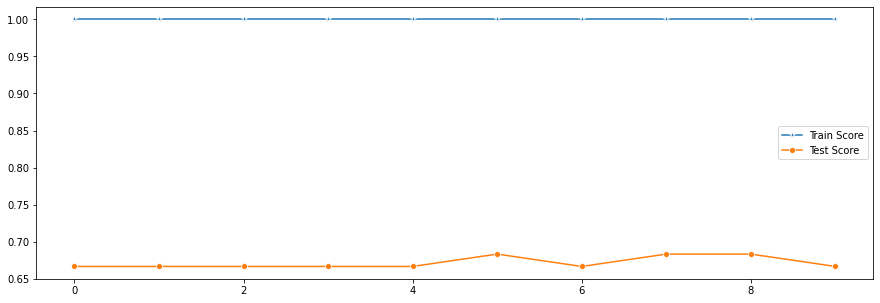

In [72]:
# 최적의 랜덤 스테이트 값을 찾아보기 

test_score_list = []
train_score_list = []

for i in range(0,10):
    rfc2 = RandomForestClassifier(random_state=i)
    rfc2.fit(x_train, y_train)
    test_score_list.append(rfc2.score(x_test, y_test))  # .score 은 랜덤 포레스트 내에서 정확도를 계산하는 함수이다. 
    train_score_list.append(rfc2.score(x_train, y_train)) # 당연히 똑같은 데이터 셋을 검사했으므로 정확도는 100%가 나온다. 
    
plt.figure(figsize=(15,5))
p = sns.lineplot(range(0,10),train_score_list,marker='*',label='Train Score')
p = sns.lineplot(range(0,10),test_score_list,marker='o',label='Test Score')

- 위의 결과를 보면 random_state 가 5일 때 가장 높음을 알 수 있다

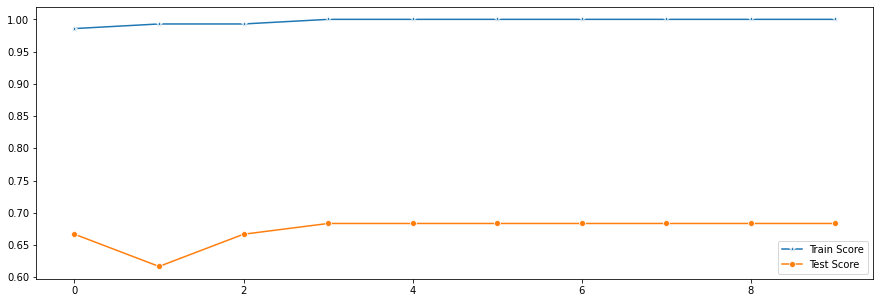

In [73]:
# 최적의 n_estimators 값 찾아보기

test_score_list = []
train_score_list = []

list_n_estimators = [10,20,30,40,50,60,70,80,90,100]


for i in range(0,len(list_n_estimators)):
    rfc3 = RandomForestClassifier(n_estimators=list_n_estimators[i], random_state=5)
    rfc3.fit(x_train, y_train)
    test_score_list.append(rfc3.score(x_test, y_test))
    train_score_list.append(rfc3.score(x_train, y_train))
    
plt.figure(figsize=(15,5))
p = sns.lineplot(range(0,len(list_n_estimators)),train_score_list,marker='*',label='Train Score')
p = sns.lineplot(range(0,len(list_n_estimators)),test_score_list,marker='o',label='Test Score')

- 위의 결과를 통해 n_estimator 이 100 일 때 정확도가 가장 높게 나옴을 알 수 있다. 

In [74]:
# 위의 best 파라미터 들을 대입하여 다시 예측해보기 
last_rfc = RandomForestClassifier(n_estimators = 100, random_state=5)

last_rfc.fit(x_train, y_train)

predict = last_rfc.predict(x_test)

print('The accuracy of the Random Forest is',metrics.accuracy_score(predict,y_test))

The accuracy of the Random Forest is 0.6833333333333333


In [75]:
# 그냥 예측한 라벨의 이름 바꿔줬음
y_pred_en = last_rfc.predict(x_test)

In [79]:
# 트레인 데이터 보기
y_pred_train_en = last_rfc.predict(x_train)

y_pred_train_en

array([3, 3, 2, 4, 2, 3, 3, 3, 4, 2, 0, 1, 4, 1, 4, 3, 4, 3, 4, 4, 4, 4,
       3, 4, 2, 4, 1, 3, 2, 3, 4, 2, 0, 0, 3, 3, 1, 3, 3, 4, 4, 4, 4, 3,
       1, 0, 0, 2, 4, 3, 4, 1, 4, 4, 1, 3, 4, 4, 2, 4, 4, 4, 2, 3, 4, 4,
       4, 3, 4, 1, 3, 2, 3, 2, 4, 4, 4, 4, 3, 4, 0, 3, 3, 4, 0, 4, 0, 4,
       4, 0, 4, 4, 2, 3, 4, 3, 2, 4, 1, 4, 4, 3, 4, 4, 4, 4, 4, 4, 1, 4,
       4, 2, 3, 1, 1, 4, 3, 4, 4, 4, 0, 4, 2, 3, 3, 2, 4, 4, 4, 4, 4, 3,
       2, 4, 3, 4, 2, 3, 2, 3])

In [80]:
# 트레인 데이터의 예측 결과를 평가해 보았으니 당연히 1이 나옴.
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Training-set accuracy score: 1.0000


In [81]:
print('Training set score: {:.4f}'.format(last_rfc.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(last_rfc.score(x_test, y_test)))

Training set score: 1.0000
Test set score: 0.6833
